In [5]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as lin
import copy

# Задача 1

In [6]:
import numpy as np

def L_p(x, p):
    return np.power(np.sum(np.power(abs(x), p)), 1/p)
                   
a=np.array([3, 3, -3, 3])
            
def inL_p(A, p):
    for j in range(10):
        K=100000
        max_v=0
        norms=[]
        for i in range (K):
            x=np.random.random((np.shape(A)[1], 1))
            norm=L_p(A@x, p)/L_p(x, p)
            if norm>max_v:
                max_v=norm
        norms.append(norm)
    return np.mean(norms)

In [7]:
A=np.array([[3, -3, 3], [2, 1, 2], [1, -4, 5]])
inL_p(A, 2)

5.596763350603299

# Задача 2

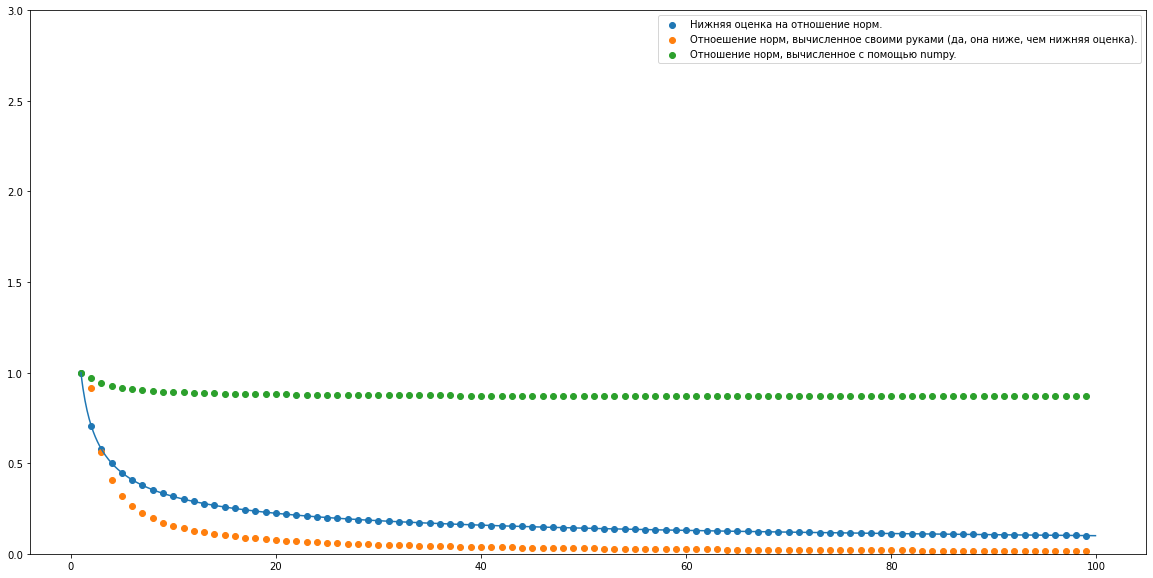

In [142]:
import numpy as np
import scipy.linalg as lin

def Frob_via_sval(A):
    m, n=np.shape(A)
    return np.sum(lin.svdvals(A)**2)


N, n=1000, 100

def make_research(N=N, n=n):
    vals=[]
    vals_2=[]
    for i in range(N):
        X=np.random.random((n, n))
        vals.append(lin.norm(X, 2)/Frob_via_sval(X))
        vals_2.append(lin.norm(X, 2)/lin.norm(X, 'fro'))
    return np.mean(vals), np.mean(vals_2), 1/np.sqrt(n)

X, Y, Z=[], [], []
for i in range(1, n):
    x, y, z=make_research(N, i)
    X.append(x); Y.append(y); Z.append(z)
w=np.arange(1, n, 1)
t=np.arange(1, n, 0.1)
plt.figure(figsize=(20, 10))
plt.scatter(w, Z, label='Нижняя оценка на отношение норм.')
plt.scatter(w, X, label='Отноешение норм, вычисленное своими руками (да, она ниже, чем нижняя оценка).')
plt.scatter(w, Y, label='Отношение норм, вычисленное с помощью numpy.')
plt.plot(t, 1/np.sqrt(t))
ax = plt.gca()
ax.set_ylim([0, 3])
plt.legend(loc='best')
plt.show()

# Задача 3

In [8]:

def gen_rand(C):
    L=lin.cholesky(C)
    x=np.random.random((np.shape(C)[0], 1))
    m=np.random.uniform(-10, 10, np.shape(C)[0])
    z=np.random.multivariate_normal(m, np.diag(x.T[0]), 1).T
    return L@z+m.reshape(np.shape(C)[0], 1)
    

In [9]:
gen_rand(np.array([[2, 3, 4], [5, 6, 7], [8, 9, 10]]))

array([[-41.60244162],
       [-23.1411923 ],
       [-11.59340436]])

# Задача 4

(210, 2)


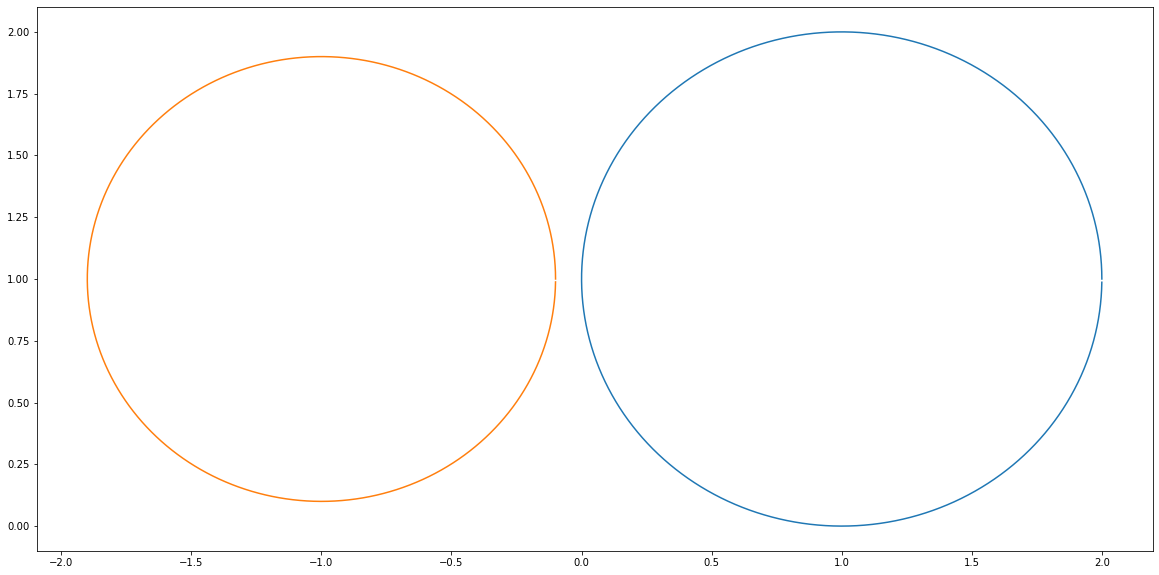

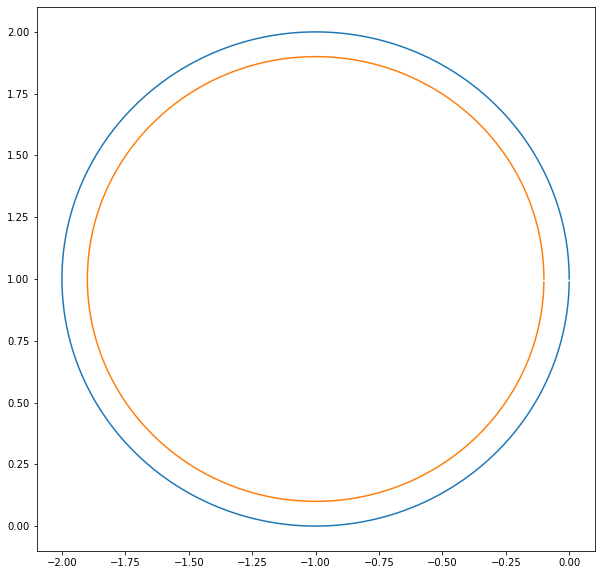

(120, 1)


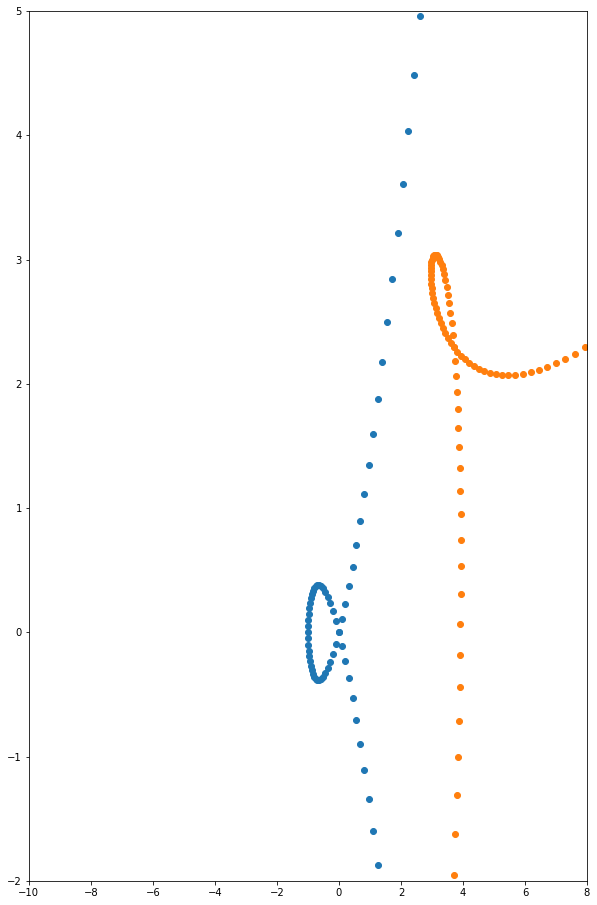

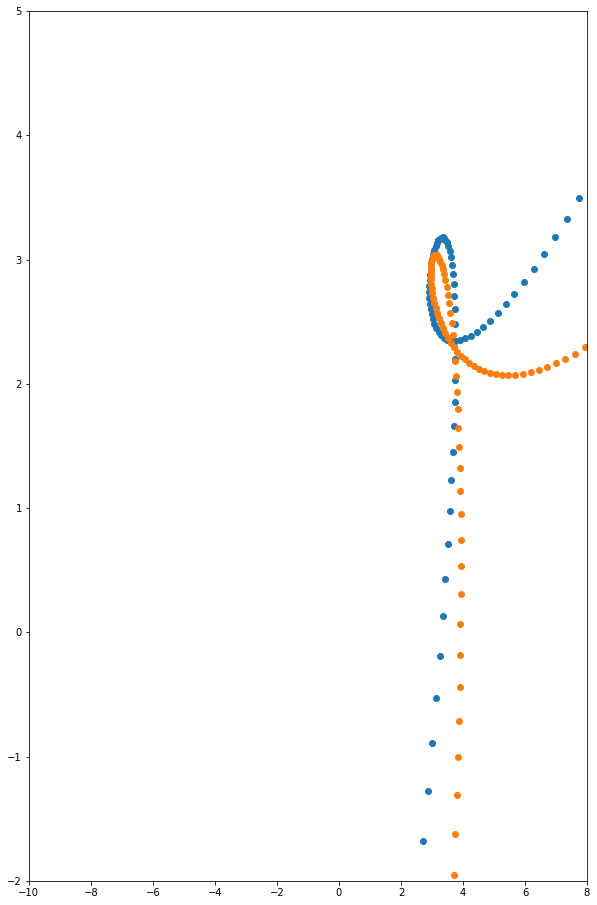

In [140]:
def get_transform(X_1, X_2):
    xm_1=np.array([np.mean(X_1[:, 0]), np.mean(X_1[:, 1])]).reshape((2, 1))
    xm_2=np.array([np.mean(X_2[:, 0]), np.mean(X_2[:, 1])]).reshape((2, 1))
    X_1[:, 0]-=np.mean(X_1[:, 0])
    X_1[:, 1]-=np.mean(X_1[:, 1])
    X_2[:, 0]-=np.mean(X_2[:, 0])
    X_2[:, 1]-=np.mean(X_2[:, 1])
    U, S, VT=lin.svd(X_1.T@X_2)
    R=U@VT
    sh=xm_2-R.T@xm_1
    return R, sh

def make_transform(Z_1, Z_2):
    R, sh=get_transform(copy.deepcopy(Z_1), copy.deepcopy(Z_2))
    Z_1=R.T@Z_1.T+sh@np.ones((1, np.shape(Z_1)[0]))
    Z_1=Z_1.T
    return Z_1

def draw_example_transform_1():
    
    D=np.arange(0, 2*np.pi, 0.03)
    D=D.reshape((len(D), 1))
    D_1, D_2=np.cos(D), np.sin(D)
    T_1=np.hstack((D_1, D_2))
    print(T_1.shape)
    T_2=T_1
    sh=np.array([[-1, 1]]).reshape((1, 2))
    ons=np.ones((np.shape(T_1)[0], 1))
    sh=ons@sh
    T_2=T_2*0.9+sh
    T_1=T_1+ons@np.array([[1, 1]]).reshape((1, 2))
    
    plt.figure(figsize=(20, 10))
    plt.plot(T_1[:, 0], T_1[:, 1])
    plt.plot(T_2[:, 0], T_2[:, 1])
    plt.show()
    
    T_1=make_transform(T_1, T_2)
    plt.figure(figsize=(10, 10))
    plt.plot(T_1[:, 0], T_1[:, 1])
    plt.plot(T_2[:, 0], T_2[:, 1])
    plt.show()

def draw_example_transform_2():
    c=np.sqrt(2)
    T=np.arange(-3, 3, 0.05)
    T=T.reshape((len(T), 1))
    print(T.shape)
    W_1=np.hstack((T**2-1, T*(T**2-1)))
    R=np.array([[1./c, 1./c], [-1./c, 1./c]])
    W_2=np.hstack((T**2, 0.5*T*(T**2-1)))@R.T+np.ones((W_1.shape[0], 1))@np.array([[3, 3]])
    plt.figure(figsize=(10, 16))
    plt.scatter(W_1[:, 0], W_1[:, 1])
    plt.scatter(W_2[:, 0], W_2[:, 1])
    ax = plt.gca()
    ax.set_ylim([-2, 5])
    ax.set_xlim([-10, 8])
    plt.show()
    
    W_1=make_transform(W_1, W_2)
    plt.figure(figsize=(10, 16))
    plt.scatter(W_1[:, 0], W_1[:, 1])
    plt.scatter(W_2[:, 0], W_2[:, 1])
    ax = plt.gca()
    ax.set_ylim([-2, 5])
    ax.set_xlim([-10, 8])
    plt.show()

draw_example_transform_1()    

draw_example_transform_2()